In [11]:
import sys
sys.path.append('../')
sys.path.append('/Users/sdbykov/work/my_packages/nway')

In [12]:
from scripts.utils import data_path, set_mpl
from scripts.cross_match_scripts import pandas_to_fits, fits_to_pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

,srcname_fin,csc_name,csc_ra,csc_dec,csc_err_ellipse_r0,csc_err_ellipse_r1,csc_1sigma,csc_FLUX_05_2,csc_flux_aper_sm_err,csc_likelihood,csc_likelihood_class,sep_ero_csc,sep_csc_desi,release,brickid,objid,ra,dec,desi_id,IDSRC_desi_id,ero_flux_05-20,csc_flux / ero_flux
0,SRGe J105316.7+573551,2CXO J105316.7+573550,163.319906,57.597453,0.712676,0.711335,0.290882,NaN,NaN,15055.956674,TRUE,0.970884,0.144735,9011,609950,3809,163.319852,57.597425,9011_609950_3809,SRGe J105316.7+573551_9011_609950_3809,1.327770e-13,NaN
1,SRGe J105335.1+572543,2CXO J105335.0+572541,163.395863,57.428329,0.740180,0.718313,0.297959,NaN,NaN,5957.706781,TRUE,1.062877,0.241237,9011,609951,491,163.395958,57.428372,9011_609951_491,SRGe J105335.1+572543_9011_609951_491,7.887368e-14,NaN
2,SRGe J105432.1+580046,2CXO J105432.2+580047,163.634353,58.013174,0.856368,0.759133,0.330595,0.0,1.382023e-14,654.613560,TRUE,1.697386,0.261635,9011,611496,691,163.634295,58.013108,9011_611496_691,SRGe J105432.1+580046_9011_611496_691,6.718623e-14,0.0


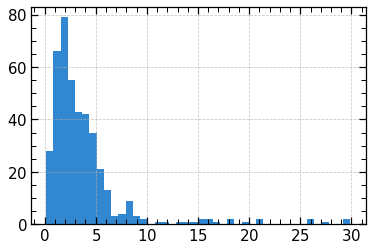

In [13]:
csc_ctps = pd.read_csv(data_path+'ero_csc_desi.csv')
plt.hist(csc_ctps.sep_ero_csc)
csc_ctps.head(3)

,srcname_fin,xmm_SRCID,xmm_SC_RA,xmm_SC_DEC,xmm_SC_POSERR,xmm_1sigma,xmm_FLUX_05_2,xmm_FLUX_05_2_err,xmm_SC_DET_ML,xmm_SC_SUM_FLAG,xmm_CONFUSED,sep_ero_xmm,sep_xmm_desi,release,brickid,objid,ra,dec,desi_id,IDSRC_desi_id,ero_flux_05-20,xmm_flux / ero_flux
0,SRGe J104117.7+584929,205562112010003,160.324685,58.824762,0.817968,0.580060,8.770400e-14,6.519681e-15,742.578,0,False,2.015272,0.975167,9011,613766,43,160.324219,58.824639,9011_613766_43,SRGe J104117.7+584929_9011_613766_43,1.817271e-13,0.482614
1,SRGe J103618.3+581246,205562110010001,159.076917,58.213093,0.568896,0.403431,1.677284e-13,8.215893e-15,1899.140,0,False,1.987860,1.384893,9011,612250,2743,159.076381,58.212831,9011_612250_2743,SRGe J103618.3+581246_9011_612250_2743,1.704142e-13,0.984240
2,SRGe J105316.7+573551,201237001010003,163.319955,57.597429,0.077942,0.055272,9.493300e-14,5.897774e-16,20363.300,1,False,1.045047,0.199473,9011,609950,3809,163.319852,57.597425,9011_609950_3809,SRGe J105316.7+573551_9011_609950_3809,1.327770e-13,0.714981


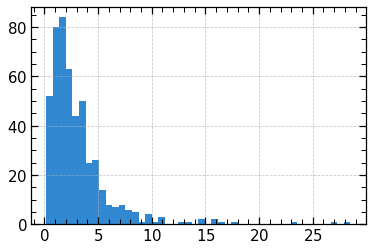

In [14]:
xmm_ctps = pd.read_csv(data_path+'ero_xmm_desi.csv')
plt.hist(xmm_ctps.sep_ero_xmm)
xmm_ctps.head(3)

In [125]:
xmm_ctps = xmm_ctps[xmm_ctps['xmm_flux / ero_flux'] <  5 ]
xmm_ctps = xmm_ctps[xmm_ctps['xmm_flux / ero_flux'] >  1/5 ]

csc_ctps = csc_ctps[csc_ctps['csc_flux / ero_flux'] <  5 ]
csc_ctps = csc_ctps[csc_ctps['csc_flux / ero_flux'] >  1/5 ]

In [126]:
xmm_ctps = xmm_ctps.query('sep_ero_xmm < 10 ')[['srcname_fin','desi_id']]
csc_ctps = csc_ctps.query('sep_ero_csc < 10')[['srcname_fin','desi_id']]


finall_ctps = pd.concat([xmm_ctps, csc_ctps])
finall_ctps.sort_values(by='srcname_fin', inplace=True)
finall_ctps

,srcname_fin,desi_id
368,SRGe J103105.9+573747,9011_610714_1440
257,SRGe J103118.8+574434,9011_610714_1908
48,SRGe J103123.8+574309,9011_610714_2092
284,SRGe J103130.8+573932,9011_610714_2412
173,SRGe J103137.0+573159,9011_609939_1093
...,...,...
129,SRGe J110633.0+590313,9011_614527_1198
193,SRGe J110645.0+590331,9011_614527_1596
169,SRGe J110648.4+585514,9011_614527_1704
73,SRGe J110721.2+585635,9011_614527_2647


In [127]:
df_tmp = finall_ctps.groupby('srcname_fin').agg(lambda x: len(x.unique()))
df_tmp.rename(columns={'desi_id':'n_desi'}, inplace=True)
df_tmp


,n_desi
srcname_fin,
SRGe J103105.9+573747,1
SRGe J103118.8+574434,1
SRGe J103123.8+574309,1
SRGe J103130.8+573932,1
SRGe J103137.0+573159,1
...,...
SRGe J110633.0+590313,1
SRGe J110645.0+590331,1
SRGe J110648.4+585514,1


In [128]:

finall_ctps = finall_ctps.merge(df_tmp, on='srcname_fin', how='left')
finall_ctps.n_desi.value_counts()

1    766
2      2
Name: n_desi, dtype: int64

In [129]:
finall_ctps = finall_ctps[finall_ctps.n_desi == 1]
finall_ctps.drop_duplicates(subset='srcname_fin', inplace=True)
finall_ctps.rename(columns={'srcname_fin':'ID'}, inplace=True)
finall_ctps.rename(columns={'desi_id':'desi_id_true_ctp'}, inplace=True)
finall_ctps.ID = finall_ctps.ID.str.encode('utf-8')
finall_ctps.desi_id_true_ctp = finall_ctps.desi_id_true_ctp.str.encode('utf-8')


print(finall_ctps.shape)
finall_ctps.drop(columns=['n_desi'], inplace=True)
finall_ctps.to_pickle(data_path+'validation_ctps_ero_desi_lh.pkl')

(686, 3)
